In [58]:
import pandas as pd
import numpy as np

In [59]:
data = pd.read_csv('data/movie.csv')

## 缺失数据处理

### 一、缺失值判断

#### 1.1 pd.isnull() 返回 T F 数据  or pd.isna()

In [60]:
data.isnull().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False


#### 1.1 pd.notnull() 返回 T F 数据  or pd.notna()

In [61]:
data.notnull().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,False,False,True,False,True,True,False,True,...,False,False,False,False,False,False,True,True,False,True


#### 1.3 np.any(data.isnull()) 只要返回True，证明有空值

In [62]:
# data.isnull()判断是否有NaN，返回数据shape，NaN为True，否则为False
# numpy any 任意True，为True
np.any(data.isnull())

True

#### 1.4 np.all(data.notnull()) 只要返回False，证明有空值

In [63]:
# data.notnull()判断是否无NaN，返回数据shape，NaN为False，否则为True
# numpy all 全True，为True
np.all(data.notnull())

False

### 二、读取包含缺失值的数据

#### 2.1、读取时对缺失值操作

In [64]:
# na_values 将那些值替换为nan，不一定所有数据的缺失值都以nan展示
pd.read_csv('./data/survey_visited.csv', na_values=['?'])

,ident,site,dated
0,619.0,DR-1,1927-02-08
1,622.0,DR-1,1927-02-10
2,734.0,DR-3,1939-01-07
3,735.0,DR-3,1930-01-12
4,751.0,DR-3,1930-02-26
5,752.0,DR-3,NaN
6,837.0,MSK-4,1932-01-14
7,844.0,DR-1,1932-03-22
8,NaN,NaN,NaN


In [65]:
# keep_default_na 是否将空位置使用nan填充,默认true
pd.read_csv('./data/survey_visited.csv', na_values=['?'], keep_default_na=False)

,ident,site,dated
0,619.0,DR-1,1927-02-08
1,622.0,DR-1,1927-02-10
2,734.0,DR-3,1939-01-07
3,735.0,DR-3,1930-01-12
4,751.0,DR-3,1930-02-26
5,752.0,DR-3,
6,837.0,MSK-4,1932-01-14
7,844.0,DR-1,1932-03-22
8,NaN,NaN,NaN


#### 2.1、缺失值观测

In [66]:
titanic = pd.read_csv('./data/titanic_train.csv')
# 通过行数，判断存在缺失值的列
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
# 通过合集找出缺失数量
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### 2.2、缺失值图形化

<Axes: >

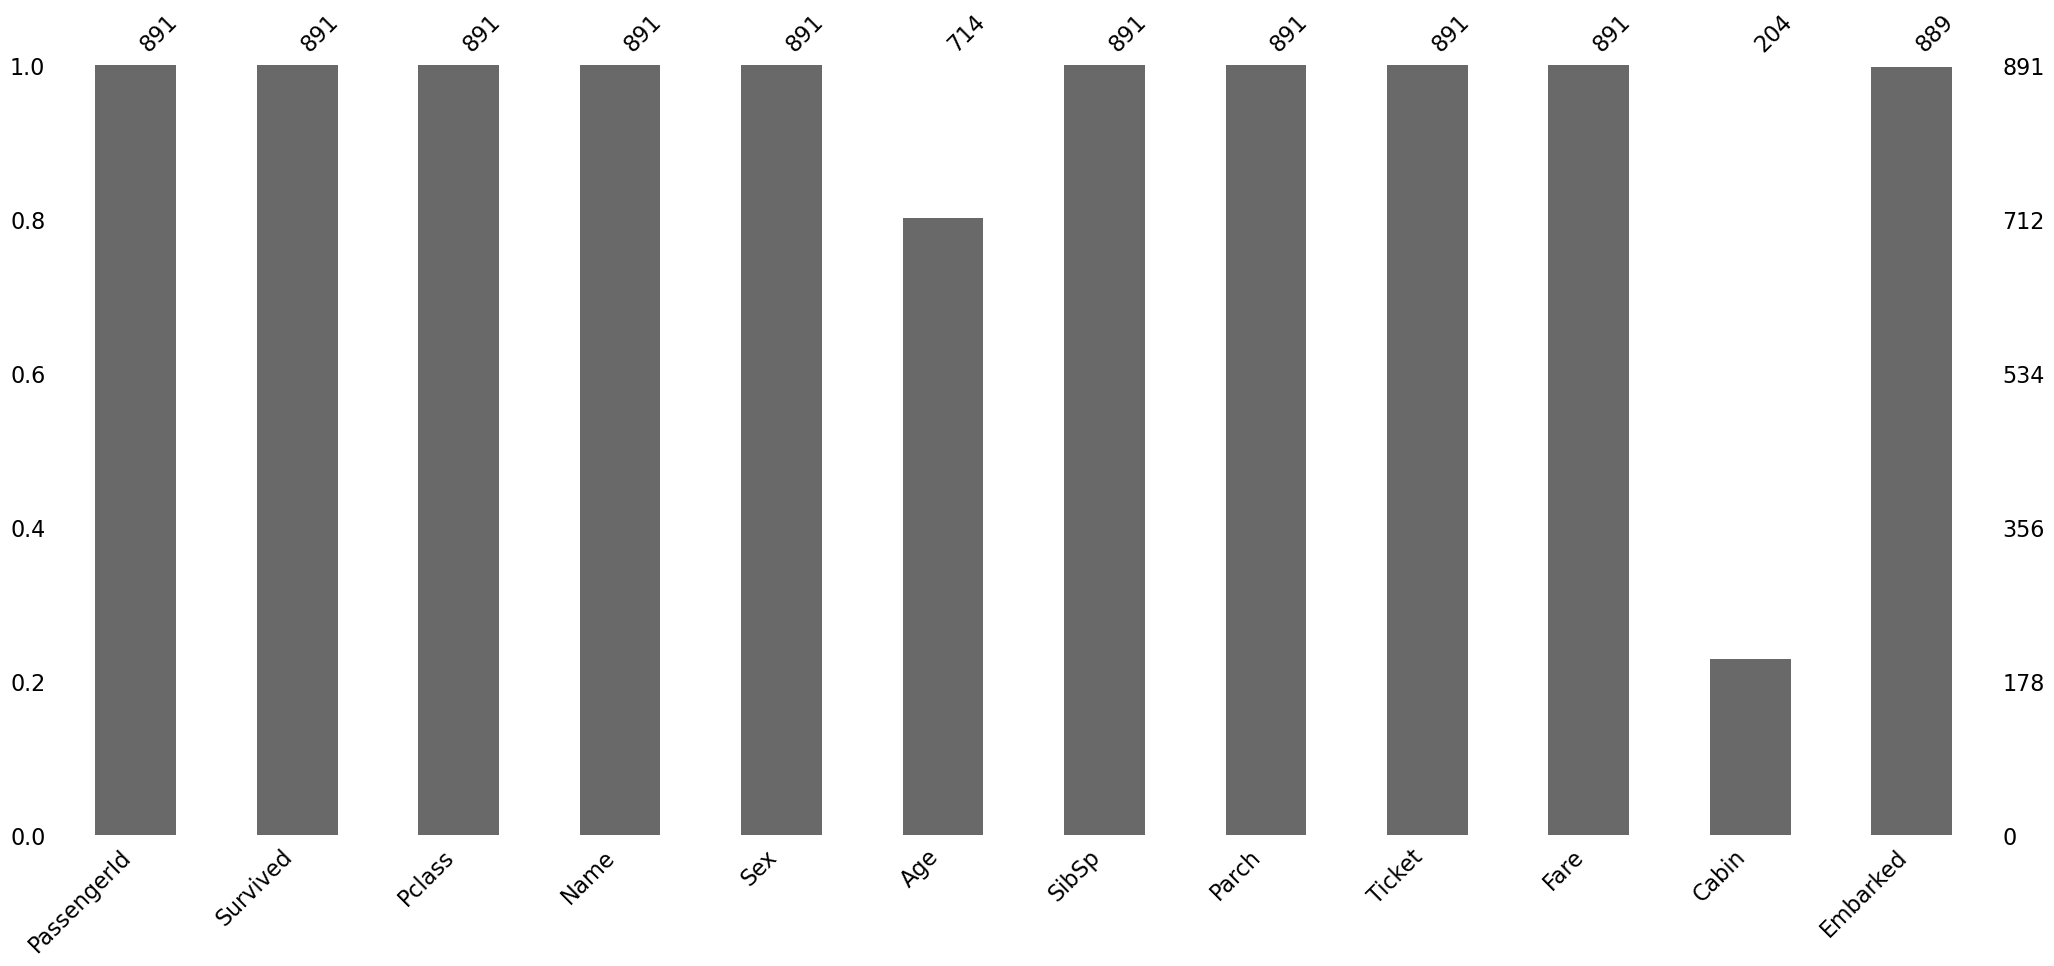

In [68]:
import missingno as msno
# 缺失值直方图
msno.bar(titanic)

<Axes: >

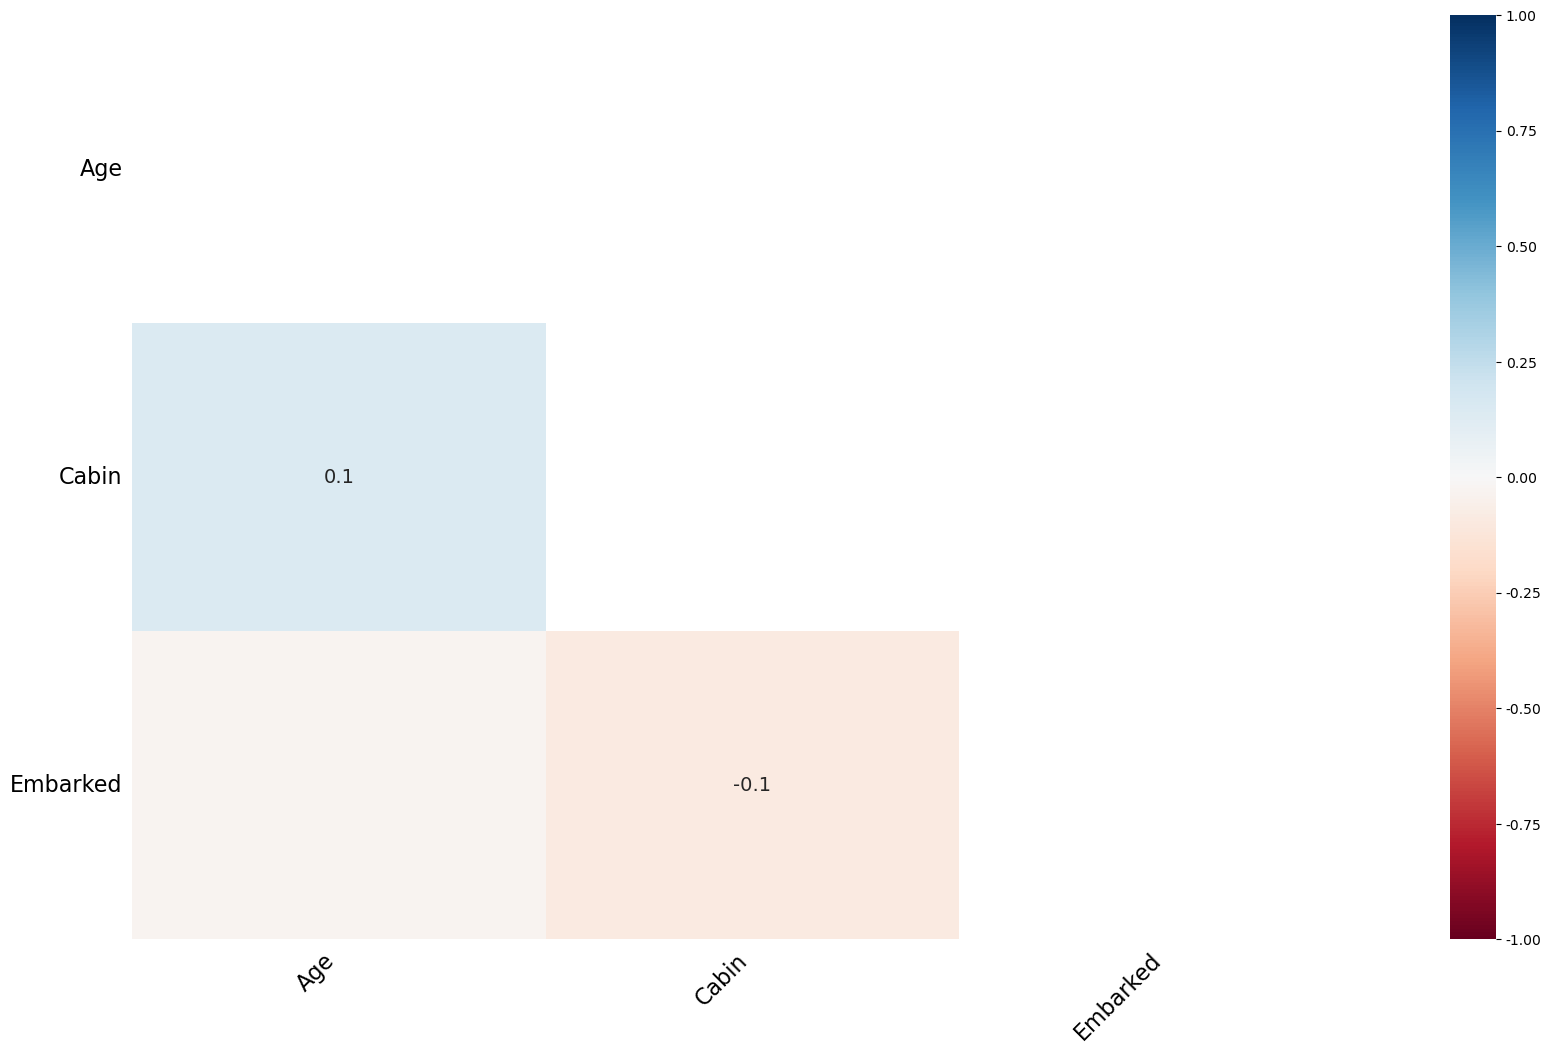

In [69]:
# 缺失值热力图
msno.heatmap(titanic)

### 三、缺失值处理
- replace替换缺失值

#### 3.1、删除缺失值 df.dropna

In [70]:
# 原始数据
titanic.shape

(891, 12)

In [71]:
# 删除空后
titanic.dropna().shape

(183, 12)

##### 3.1.1 参数subset，指定判定缺失值的列

In [72]:
titanic.dropna(subset='Age').shape

(714, 12)

##### 3.1.2 参数how， 删除限制，只有整行全是nan才删除，默认是any，行内有nan就删除整行

In [73]:
titanic.dropna(how='all').shape

(891, 12)

##### 3.1.3 参数axis，指定删除行或列，默认按行删除

In [74]:
titanic.dropna(axis='columns').shape

(891, 9)

##### 3.1.3 参数inplace，是否在原数据删除，默认false

#### 3.2、填充缺失值 df.fillna

##### 3.2.1 非时序数据的缺失值填充 df.fillna(value, inplace)

In [75]:
titanic.fillna(0).isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [76]:
# eg: 使用相关数据填充nan
titanic['Age'].fillna(titanic['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

##### 3.2.2 时序数据的缺失值填充(数据与时间有关系)

In [77]:
# parse_dates解析日期，index_col将哪一列作为索引
city_day = pd.read_csv('./data/city_day.csv', parse_dates=['Date'], index_col='Date')

In [78]:
temp = city_day['Xylene'][50:64]
temp

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [79]:
# 按下一个值填充
bfill = temp.fillna(method='bfill')
bfill

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     1.32
2015-02-27     1.32
2015-02-28     1.32
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

<Axes: xlabel='Date'>

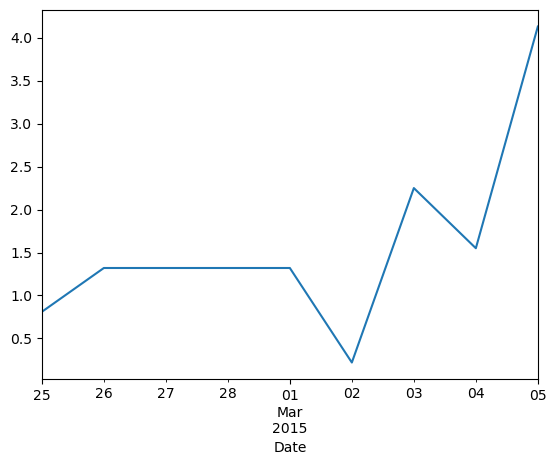

In [80]:
bfill[5:].plot()

In [81]:
# 按前一值填
ffill = temp.fillna(method='ffill')
ffill

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

<Axes: xlabel='Date'>

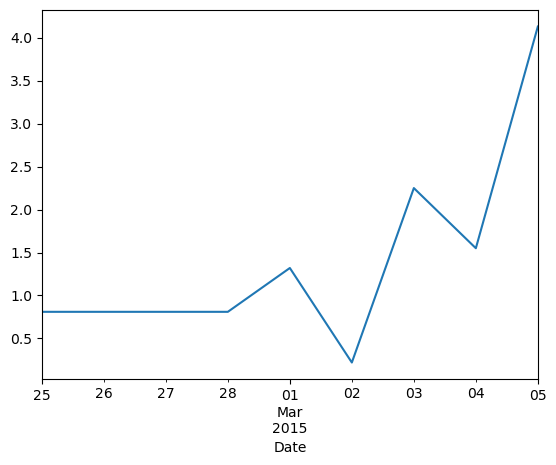

In [82]:
ffill[5:].plot()

In [83]:
# 按线性插值填充
interpolate = temp.interpolate(limit_direction='both')

<Axes: xlabel='Date'>

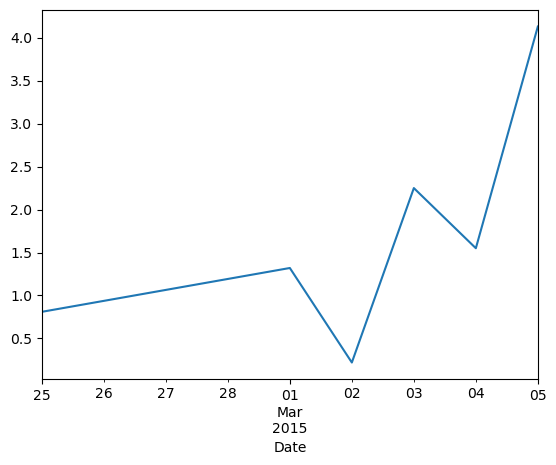

In [84]:
interpolate[5:].plot()

### 四、缺失值处理的一般方式

- 能不删就不删。 除非如果某列数据, 有大量的缺失值(50% 以上是缺失值, 但也要具体情况具体分析)
- 如果是类别型的, 可以考虑使用 '缺失' 来进行填充
- 如果是数值型 可以用一些统计量 (均值/中位数/众数) 或者业务的默认值来填充